In [9]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
import spacy

In [10]:
img_cv = cv2.imread('./BusinessCardNer/Selected/052.jpeg', ) 

cv2.imshow('Business card', img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

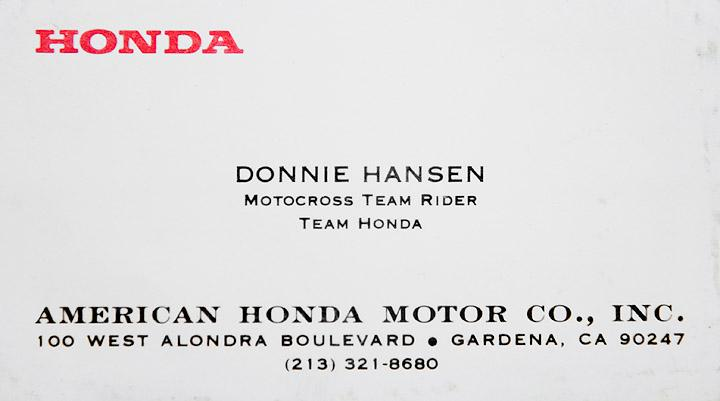

In [11]:
img_pl = PIL.Image.open('./BusinessCardNer/Selected/052.jpeg')
img_pl

In [12]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

In [13]:
type(img_cv)

numpy.ndarray

In [14]:
text_cv = pytesseract.image_to_string(img_cv)
print(text_cv)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



In [15]:
text_pl = pytesseract.image_to_string(img_pl)

In [16]:
print(text_pl)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



In [17]:
data = pytesseract.image_to_data(img_cv)

In [18]:
type(data)

str

In [19]:
dataList = list(map(lambda x: x.split('\t'), data.split('\n')))

In [20]:
df = pd.DataFrame(dataList[1:], columns=dataList[0])
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,92.618942,HONDA
5,2,1,2,0,0,0,237,166,246,63,-1,
6,3,1,2,1,0,0,237,166,246,63,-1,
7,4,1,2,1,1,0,237,166,246,16,-1,
8,5,1,2,1,1,1,237,166,112,16,96.634560,DONNIE
9,5,1,2,1,1,2,364,166,119,16,95.774574,HANSEN


In [21]:
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,92.618942,HONDA


In [22]:
df.dropna(inplace=True) # drop the missings in rows
col_int = ['level',	'page_num',	'block_num', 'par_num', 'line_num',	'word_num',	'left',	'top', 'width', 'height', 'conf']
df[col_int] = df[col_int].astype(float).round().astype(int)

In [23]:
df.dtypes

level         int64
page_num      int64
block_num     int64
par_num       int64
line_num      int64
word_num      int64
left          int64
top           int64
width         int64
height        int64
conf          int64
text         object
dtype: object

In [24]:
import cv2

image = img_cv.copy()
level = "word"

for l, x, y, w, h, c, txt in df[['level', 'left', 'top', 'width', 'height', 'conf', 'text']].values:
    if level == 'page':
        if l == 1:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 2)
        else:
            continue

    elif level == 'block':
        if l == 2:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        else:
            continue

    elif level == 'para':
        if l == 3:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        else:
            continue

    elif level == 'line':  
        if l == 4:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        else:
            continue

    elif level == 'word':
        if l == 5:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(image, txt, (x, y), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)
        else:
            continue

cv2.imshow("bounding box", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
